# 03 — Feature Engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Load Cleaned Data

In [2]:
df = pd.read_csv('../data/processed/otodom_cleaned.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (502, 11)


,price,market,surface,location,advertiser_type,no_of_rooms,form_of_property,is_for_sale,price_per_m2,voivodeship,city
0,549000.0,"[""market"",""secondary""]",41.8,"ul. Komandorska, Borek, Wrocław, dolnośląskie",agency,2.0,NaN,True,13133.971292,NaN,dolnośląskie
1,410000.0,"[""market"",""secondary""]",64.0,"Unieszewo, olsztyński, warmińsko-mazurskie",private,3.0,spółdzielcze wł. prawo do lokalu,True,6406.250000,NaN,NaN
2,129000.0,"[""market"",""secondary""]",92.0,"Nowy Las, Głuchołazy, nyski, opolskie",agency,4.0,pełna własność,True,1402.173913,NaN,opolskie
3,820000.0,"[""market"",""secondary""]",106.0,"Brzesko, Brzesko, brzeski, małopolskie",private,4.0,NaN,True,7735.849057,NaN,małopolskie
4,1399000.0,"[""market"",""primary""]",189.4,"Zelków, Zabierzów, krakowski, małopolskie",agency,5.0,NaN,True,7386.483633,NaN,małopolskie


In [3]:
df.dtypes

price               float64
market                  str
surface             float64
location                str
advertiser_type         str
no_of_rooms         float64
form_of_property        str
is_for_sale            bool
price_per_m2        float64
voivodeship             str
city                    str
dtype: object

## Categorical Columns Overview

In [4]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f'{col}: {df[col].nunique()} unique values')
    print(df[col].value_counts().head(5))
    print('---')

market: 2 unique values
market
["market","secondary"]    297
["market","primary"]      178
Name: count, dtype: int64
---
location: 485 unique values
location
Głogów, głogowski, dolnośląskie    3
Warszawa, mazowieckie              3
Ursus, Warszawa, mazowieckie       2
Śródmieście, Bytom, śląskie        2
Stare Gliwice, Gliwice, śląskie    2
Name: count, dtype: int64
---
advertiser_type: 3 unique values
advertiser_type
agency       367
private       72
developer     36
Name: count, dtype: int64
---
form_of_property: 3 unique values
form_of_property
pełna własność                      246
spółdzielcze wł. prawo do lokalu     22
udział                                3
Name: count, dtype: int64
---
voivodeship: 11 unique values
voivodeship
mazowieckie      17
małopolskie      13
dolnośląskie      9
wielkopolskie     7
łódzkie           5
Name: count, dtype: int64
---
city: 40 unique values
city
dolnośląskie    38
mazowieckie     35
pomorskie       31
śląskie         26
małopolskie     22
N

C:\Users\olivi\AppData\Local\Temp\ipykernel_23548\1228192743.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include='object').columns.tolist()


## Handle Missing Values

In [5]:
print(df.isnull().sum())
print(f'\nTotal rows: {len(df)}')

price                 0
market               27
surface               0
location              0
advertiser_type      27
no_of_rooms          19
form_of_property    231
is_for_sale           0
price_per_m2          0
voivodeship         442
city                195
dtype: int64

Total rows: 502


In [6]:
df['no_of_rooms'] = df['no_of_rooms'].fillna(df['no_of_rooms'].median())
df['market'] = df['market'].fillna('unknown')
df['advertiser_type'] = df['advertiser_type'].fillna('unknown')
df['form_of_property'] = df['form_of_property'].fillna('unknown')
df['voivodeship'] = df['voivodeship'].fillna('unknown')
df['city'] = df['city'].fillna('unknown')

print(f'Missing after fill:\n{df.isnull().sum()}')

Missing after fill:
price               0
market              0
surface             0
location            0
advertiser_type     0
no_of_rooms         0
form_of_property    0
is_for_sale         0
price_per_m2        0
voivodeship         0
city                0
dtype: int64


## Encode Categorical Features

In [7]:
df_encoded = pd.get_dummies(df, columns=['market', 'advertiser_type', 'form_of_property', 'is_for_sale'], drop_first=True)
print(f'Shape after encoding: {df_encoded.shape}')
df_encoded.head()

Shape after encoding: (502, 16)


,price,surface,location,no_of_rooms,price_per_m2,voivodeship,city,"market_[""market"",""secondary""]",market_unknown,advertiser_type_developer,advertiser_type_private,advertiser_type_unknown,form_of_property_spółdzielcze wł. prawo do lokalu,form_of_property_udział,form_of_property_unknown,is_for_sale_True
0,549000.0,41.8,"ul. Komandorska, Borek, Wrocław, dolnośląskie",2.0,13133.971292,unknown,dolnośląskie,True,False,False,False,False,False,False,True,True
1,410000.0,64.0,"Unieszewo, olsztyński, warmińsko-mazurskie",3.0,6406.250000,unknown,unknown,True,False,False,True,False,True,False,False,True
2,129000.0,92.0,"Nowy Las, Głuchołazy, nyski, opolskie",4.0,1402.173913,unknown,opolskie,True,False,False,False,False,False,False,False,True
3,820000.0,106.0,"Brzesko, Brzesko, brzeski, małopolskie",4.0,7735.849057,unknown,małopolskie,True,False,False,True,False,False,False,True,True
4,1399000.0,189.4,"Zelków, Zabierzów, krakowski, małopolskie",5.0,7386.483633,unknown,małopolskie,False,False,False,False,False,False,False,True,True


## Encode Voivodeship (Label Encoding)

In [8]:
le_voivodeship = LabelEncoder()
df_encoded['voivodeship_encoded'] = le_voivodeship.fit_transform(df_encoded['voivodeship'])

le_city = LabelEncoder()
df_encoded['city_encoded'] = le_city.fit_transform(df_encoded['city'])

df_encoded = df_encoded.drop(columns=['voivodeship', 'city', 'location'])
df_encoded.head()

,price,surface,no_of_rooms,price_per_m2,"market_[""market"",""secondary""]",market_unknown,advertiser_type_developer,advertiser_type_private,advertiser_type_unknown,form_of_property_spółdzielcze wł. prawo do lokalu,form_of_property_udział,form_of_property_unknown,is_for_sale_True,voivodeship_encoded,city_encoded
0,549000.0,41.8,2.0,13133.971292,True,False,False,False,False,False,False,True,True,6,7
1,410000.0,64.0,3.0,6406.250000,True,False,False,True,False,True,False,False,True,6,29
2,129000.0,92.0,4.0,1402.173913,True,False,False,False,False,False,False,False,True,6,19
3,820000.0,106.0,4.0,7735.849057,True,False,False,True,False,False,False,True,True,6,17
4,1399000.0,189.4,5.0,7386.483633,False,False,False,False,False,False,False,True,True,6,17


## Feature: Rooms per Surface

In [9]:
df_encoded['rooms_per_surface'] = df_encoded['no_of_rooms'] / df_encoded['surface']
df_encoded[['no_of_rooms', 'surface', 'rooms_per_surface']].describe()

,no_of_rooms,surface,rooms_per_surface
count,502.000000,502.000000,502.000000
mean,3.249004,86.491454,0.043446
std,1.397085,59.727723,0.013438
min,1.000000,8.540000,0.008219
25%,2.000000,48.000000,0.034737
50%,3.000000,63.280000,0.043478
75%,4.000000,109.395000,0.052213
max,10.000000,365.000000,0.117096


## Correlation with Price

In [10]:
corr_with_price = df_encoded.corr()['price'].sort_values(ascending=False)
print(corr_with_price)

price                                                1.000000
surface                                              0.529441
no_of_rooms                                          0.506273
price_per_m2                                         0.286169
form_of_property_unknown                             0.207701
advertiser_type_private                              0.118812
is_for_sale_True                                     0.067847
market_["market","secondary"]                        0.002909
form_of_property_udział                             -0.040909
market_unknown                                      -0.060638
advertiser_type_unknown                             -0.060638
form_of_property_spółdzielcze wł. prawo do lokalu   -0.084122
advertiser_type_developer                           -0.094399
voivodeship_encoded                                 -0.172604
city_encoded                                        -0.243813
rooms_per_surface                                   -0.351027
Name: pr

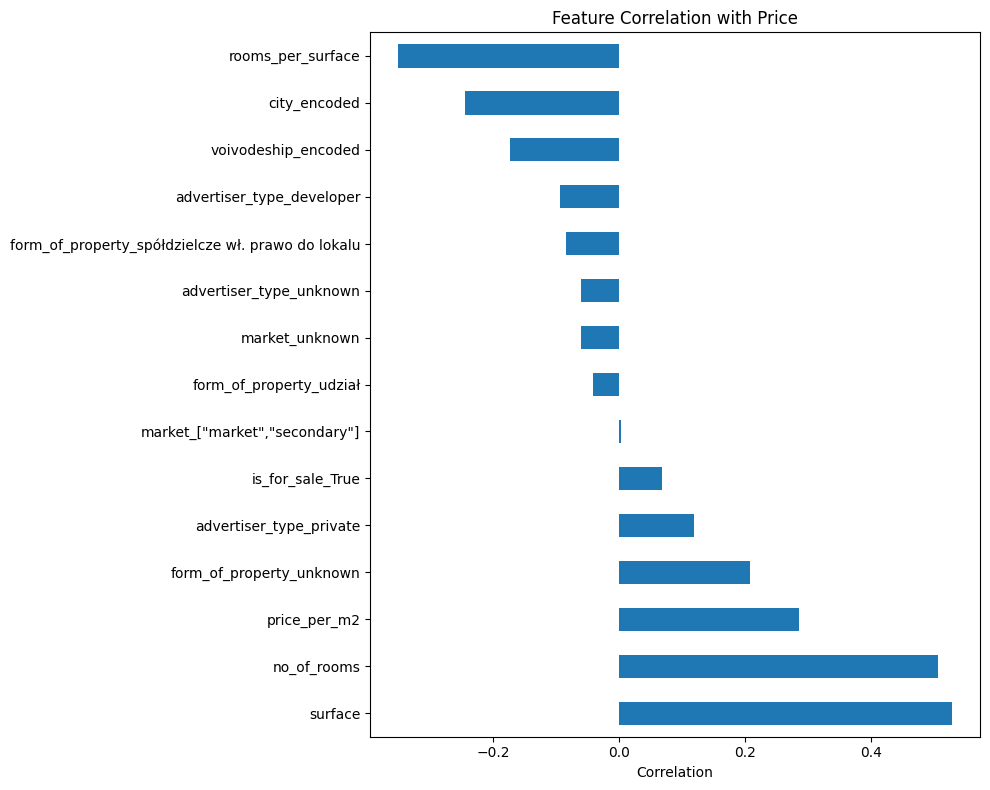

In [11]:
plt.figure(figsize=(10, 8))
corr_with_price.drop('price').plot(kind='barh')
plt.title('Feature Correlation with Price')
plt.xlabel('Correlation')
plt.tight_layout()
plt.savefig('../results/figures/feature_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

## Prepare X and y

In [12]:
X = df_encoded.drop(columns=['price', 'price_per_m2'])
y = df_encoded['price']

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
print(f'\nFeatures: {X.columns.tolist()}')

X shape: (502, 14)
y shape: (502,)

Features: ['surface', 'no_of_rooms', 'market_["market","secondary"]', 'market_unknown', 'advertiser_type_developer', 'advertiser_type_private', 'advertiser_type_unknown', 'form_of_property_spółdzielcze wł. prawo do lokalu', 'form_of_property_udział', 'form_of_property_unknown', 'is_for_sale_True', 'voivodeship_encoded', 'city_encoded', 'rooms_per_surface']


## Scale Features

In [13]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_scaled.describe()

,surface,no_of_rooms,"market_[""market"",""secondary""]",market_unknown,advertiser_type_developer,advertiser_type_private,advertiser_type_unknown,form_of_property_spółdzielcze wł. prawo do lokalu,form_of_property_udział,form_of_property_unknown,is_for_sale_True,voivodeship_encoded,city_encoded,rooms_per_surface
count,5.020000e+02,5.020000e+02,5.020000e+02,5.020000e+02,5.020000e+02,5.020000e+02,5.020000e+02,5.020000e+02,5.020000e+02,5.020000e+02,5.020000e+02,5.020000e+02,5.020000e+02,5.020000e+02
mean,1.450809e-16,1.556966e-16,-7.961759e-17,-4.246271e-17,-2.830848e-17,-3.538559e-17,-4.246271e-17,-5.307839e-17,5.307839e-17,-2.123136e-17,-4.600127e-17,1.963900e-16,9.377183e-17,-8.315615e-17
std,1.000998e+00,1.000998e+00,1.000998e+00,1.000998e+00,1.000998e+00,1.000998e+00,1.000998e+00,1.000998e+00,1.000998e+00,1.000998e+00,1.000998e+00,1.000998e+00,1.000998e+00,1.000998e+00
min,-1.306415e+00,-1.611389e+00,-1.203653e+00,-2.384158e-01,-2.779446e-01,-4.091966e-01,-2.384158e-01,-2.140872e-01,-7.753724e-02,-9.232543e-01,-2.238303e+01,-4.378924e+00,-2.282001e+00,-2.624071e+00
25%,-6.450916e-01,-8.948992e-01,-1.203653e+00,-2.384158e-01,-2.779446e-01,-4.091966e-01,-2.384158e-01,-2.140872e-01,-7.753724e-02,-9.232543e-01,4.467671e-02,1.895967e-01,-7.306653e-01,-6.487424e-01
50%,-3.890088e-01,-1.784089e-01,8.308042e-01,-2.384158e-01,-2.779446e-01,-4.091966e-01,-2.384158e-01,-2.140872e-01,-7.753724e-02,-9.232543e-01,4.467671e-02,1.895967e-01,5.297952e-01,2.367619e-03
75%,3.838484e-01,5.380813e-01,8.308042e-01,-2.384158e-01,-2.779446e-01,-4.091966e-01,-2.384158e-01,-2.140872e-01,-7.753724e-02,1.083125e+00,4.467671e-02,1.895967e-01,5.297952e-01,6.530122e-01
max,4.667621e+00,4.837023e+00,8.308042e-01,4.194352e+00,3.597839e+00,2.443813e+00,4.194352e+00,4.670994e+00,1.289703e+01,1.083125e+00,4.467671e-02,3.996698e+00,1.596339e+00,5.486132e+00


## Save Processed Data

In [14]:
df_encoded.to_csv('../data/processed/otodom_features.csv', index=False)
print('Saved to data/processed/otodom_features.csv')

Saved to data/processed/otodom_features.csv
